<center><img src="https://gitlab.com/accredian/insaid-data/-/raw/main/Logo-Accredian/Case-Study-Cropped.png" width= 30% />
</center>

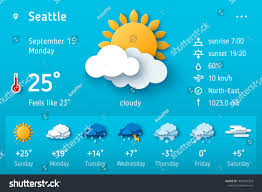

## SEATTLE WEATHER PREDICTION (ML - ADVANCED)

**Submitted by SUJEET KUMAR PANDIT**

**PGP DSAI Student, INSAID**

**Batch: JUNE 20,2021**

# **Table of Contents**
1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
  3.1 [**Installing Libraries**](#Section31)<br>
  3.2 [**Upgrading Libraries**](#Section32)<br>
  3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Processing**](#Section5)<br>
6. [**Exploratory Data Analysis**](#Section6)<br>
7. [**Data Post-Processing**](#Section7)<br>
8. [**Model Development & Evaluation**](#Section8)<br>
9. [**Conclusion**](#Section9)</br>

# **1. Introduction**
### Company Introduction - Meteomate

##### Your client for this project is a top forecasting company - Meteomate
- 1) They specialize in providing tailored IT solutions for weather forecasting, the energy industry, and the trading market.
- 2) They have extensive experience in developing market-leading forecasting systems and high-speed processing solutions for weather data.
- 3) They are committed to the creation of accurate weather forecasts that clients can trust, going to extra effort to make their weather API easy to consume.


### Current Scenario
 - 1) They have created purpose-built weather drones, allowing them to capture observations missed by traditional methods (such as satellites and weather balloons), and calculating forecasts on the fly to ensure a customer receives a forecast based on the latest observations.

# **2. Problem Statement**
- This section is emphasised on providing some generic introduction to the problem that most companies confront.

### The company suffers from the following problems:
   - The **forecasting process** is based on making predictions using a **large number** of variables, and performing **complex calculations** on them.
   - This results in a massive **load on the servers** and also causes a **slight delay** in **receiving the forecasts.**

The company has hired you as a data science consultant.
They want to make the forecasting process more efficient.

### Your Role
   - You are given datasets containing complete records of daily rainfall patterns of Seattle.
   - Your task is to build a classification model using the datasets.
   - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverable
   - Deliverable:**Predict whether it will rain on a specific day or not.**
   - Machine Learning Task: **Classification**
   - Target Variable: **RAIN(True/False)**
   - Win Condition: N/A (best possible model)

### Evaluation Metric
   - The model evaluation will be based on the **Accuracy Score**.

# **3. Installing & Importing Libraries**
- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Installing Libraries**

In [3]:
!pip install ydata-profiling                               # Toolbox for Generating Statistics Report

### **Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [99]:
!pip install --upgrade ydata-profiling

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.

In [1]:
import numpy as np                                             # Importing package Numpy (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                            # Importing package pandas (For Panel Data Analysis)
import ydata_profiling
from ydata_profiling import ProfileReport                      # Import Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                # Importing matplotlib library for visualization
%matplotlib inline
import seaborn as sns                                          # Importing seaborn library for interactive visualization
#--------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                             # Importing library for scientific calculations
#--------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder                 # Importing encoding function
from sklearn.preprocessing import StandardScaler               # Importing StandardScaler function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

#--------------------------------------------------------------------------------------------------------------------------
import warnings                                                # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                              # Warnings will appear only once

# 4. Data Acquisition & Description
This step provides an in-depth description of the dataset associated with this project.

 - The dataset contains complete records of daily **rainfall patterns** of **Seattle.**
 - The column **RAIN** tells us whether rain was observed on a particular day or not.
 - This is the data that we have to predict for future samples.
 
#### The dataset is divided into two parts: Train and Test sets.

#### Training Set: 
 - The train set contains **20440 rows** and **6 columns**
 - The last column **RAIN** is the **target variable**.

#### Testing Set:
 - The test set contains **5110 rows** and **5 columns**.
 - The test set **doesn’t contain** the **RAIN** column. 
 - It needs to be predicted for the test set.

**Train Set:**

| Records |Features|Target Variable|
|:--|:--|:--|
|**20440**|**6**|**RAIN**|

**Test Set:**

|Records|Features|Predicted Variable|
|:--|:--|:--|
|**5110**|**5**|**RAIN**|
 
 |***ID***|****Feature****|****Description****|
|:--|:--|:--|
|01| Id    | Unique Identity of each observation.|
|02| DATE  | The date of the observation.|  
|03| PRCP  | The amount of precipitation, in inches.| 
|04| TMAX  | The maximum temperature for that day, in degrees Fahrenheit.|   
|05| TMIN  | The minimum temperature for that day, in degrees Fahrenheit|
|06| RAIN  | TRUE if rain was observed on that day, FALSE if it was not|

<a name = Section4></a>
# **4.1. Data Acquisition**

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

In [65]:
df = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Seattle-Weather-Prediction\seattle_train.csv")   
print('Data Shape:', df.shape)
df.head()

Data Shape: (20440, 6)


,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True
2,2,1948-01-03,0.42,45,35,True
3,3,1948-01-04,0.31,45,34,True
4,4,1948-01-05,0.17,45,32,True


 ### **Data Information**
- **Totally there are 6 Columns/Features out of which 3 are NUMERICAL and 2 are CATEGORICAL**
- **Check whether the NUMERICAL Columns have 0s and if they are relevant**
- **Convert date column into datetime format**

In [5]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20438 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


### **Data Description**

- **To get some quick description out of the data you can use describe method defined in pandas library.**
- **Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set**

In [6]:
df.describe()

,Id,PRCP,TMAX,TMIN
count,20440.000000,20438.000000,20440.000000,20440.000000
mean,10219.500000,0.104860,59.301027,44.187965
std,5900.664087,0.235564,12.700363,8.832697
min,0.000000,0.000000,4.000000,0.000000
25%,5109.750000,0.000000,50.000000,38.000000
50%,10219.500000,0.000000,58.000000,44.000000
75%,15329.250000,0.100000,69.000000,51.000000
max,20439.000000,5.020000,100.000000,69.000000


In [3]:
df_final = pd.read_csv(r"D:\DS Training\Term_Project_24\Term_Project_Gros\Seattle-Weather-Prediction\seattle_test.csv")
print('Data Shape:', df_final.shape)
df_final.head()

Data Shape: (5110, 5)


,Id,DATE,PRCP,TMAX,TMIN
0,20440,2003-12-18,0.00,54,37
1,20441,2003-12-19,0.14,51,38
2,20442,2003-12-20,0.13,48,44
3,20443,2003-12-21,0.01,51,38
4,20444,2003-12-22,0.00,53,35


In [7]:
df_final.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5110 non-null   int64  
 1   DATE    5110 non-null   object 
 2   PRCP    5110 non-null   float64
 3   TMAX    5110 non-null   int64  
 4   TMIN    5110 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 199.7+ KB


In [8]:
df_final.describe()

,Id,PRCP,TMAX,TMIN
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,22995.377299,0.111667,60.514873,45.817808
std,1475.460758,0.252374,13.015885,9.013413
min,20440.000000,0.000000,25.000000,14.000000
25%,21718.250000,0.000000,50.000000,39.000000
50%,22995.500000,0.000000,59.000000,46.000000
75%,24272.750000,0.110000,70.000000,53.000000
max,25550.000000,3.770000,103.000000,71.000000


# **5. Data Pre-Processing**
- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [4]:
# Create a ProfileReport object
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("weather_prediction_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**5.1 Data Pre-Profiling for TEST SET**

In [5]:
# Create a ProfileReport object
profile = ProfileReport(df_final, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("weather_prediction_test_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **6. Exploratory Data Analysis**

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - **Handling/Checking Duplicate Data for both the TRAIN and TEST Data Sets**

  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

-**There are actually NO DUPLICATE RECORDS/ROWS in the DATA-SETS**



In [6]:
df[df.duplicated()]

,Id,DATE,PRCP,TMAX,TMIN,RAIN


In [7]:
df_final[df_final.duplicated()]

,Id,DATE,PRCP,TMAX,TMIN


-**Now Check ALL the NUMERICAL COLUMNS for ZERO values and Replace/Substitute them with appropriate values**

-**viz. (i) tenure, (ii) MonthlyCharges and (iii) TotalCharges**

In [8]:
df.isnull().sum()

Id      0
DATE    0
PRCP    2
TMAX    0
TMIN    0
RAIN    2
dtype: int64

In [9]:
(df == 0 ).sum(axis = 0)

Id          1
DATE        0
PRCP    11771
TMAX        0
TMIN        1
RAIN    11771
dtype: int64

In [10]:
df_final.isnull().sum()

Id      0
DATE    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [11]:
(df_final == 0 ).sum(axis = 0)

Id         0
DATE       0
PRCP    2877
TMAX       0
TMIN       0
dtype: int64

In [12]:
df['PRCP'].mean()

0.1048600645855759

In [13]:
df['PRCP'].median()

0.0

In [66]:
df['PRCP'].fillna(value = df['PRCP'].mean(), inplace = True)

In [67]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20440 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20438 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 958.2+ KB


In [16]:
df['RAIN'].mode()

0    False
Name: RAIN, dtype: object

In [68]:
#fill the missing value as a False
df['RAIN'].fillna(value = False , inplace = True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20440 entries, 0 to 20439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      20440 non-null  int64  
 1   DATE    20440 non-null  object 
 2   PRCP    20440 non-null  float64
 3   TMAX    20440 non-null  int64  
 4   TMIN    20440 non-null  int64  
 5   RAIN    20440 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 818.5+ KB


In [19]:
df.isnull().sum()

Id      0
DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### **Check whether the DataSet is Balanced**

False    11773
True      8667
Name: RAIN, dtype: int64

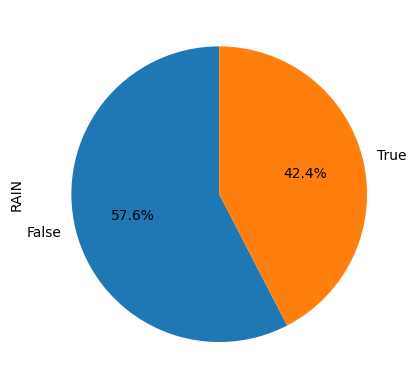

In [20]:
df['RAIN'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90);
df['RAIN'].value_counts()

Text(0.5, 1.0, 'Correlation HeatMap')

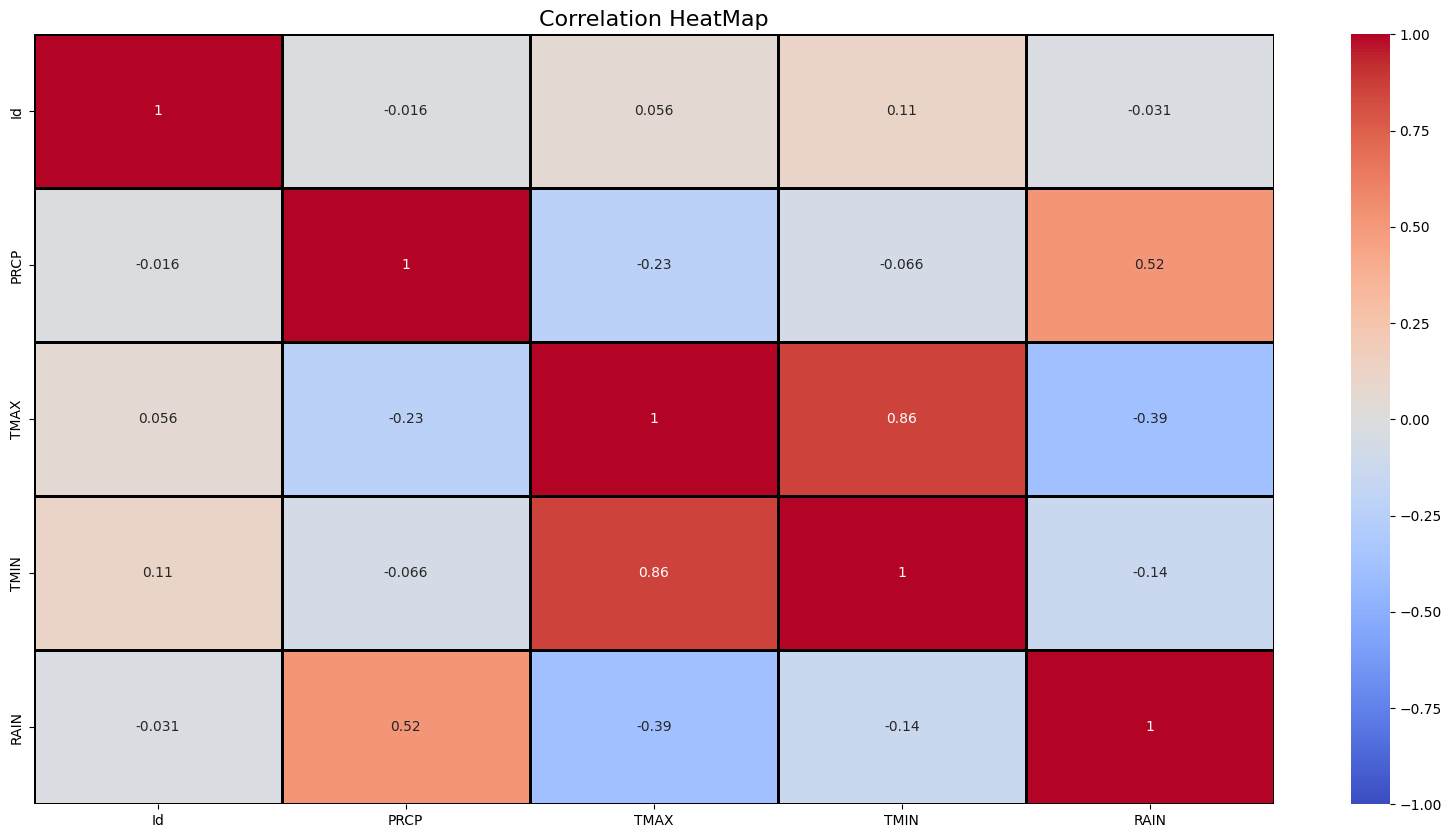

In [21]:
figure = plt.figure(figsize = (20,10))
HeatMap = sns.heatmap(df.corr(),annot = True,cmap = 'coolwarm',vmin = -1, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

#### What is the range of values (minimum to maximum) in the TMAX column of the train data before preprocessing?

<AxesSubplot: xlabel='TMAX', ylabel='Density'>

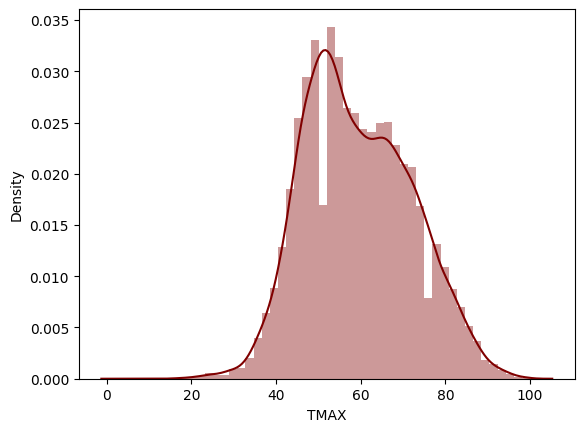

In [22]:
sns.distplot(a= df.TMAX , kde=True, color = 'maroon')

### OBSERVATIONS
- **PRCP** has HIGH Positive CORRELATION with **RAIN**
- **TMAX** has HIGH negative CORRELATION with **RAIN**

### Seperating out the Categorical and Numerical columns

In [23]:
df.head(2)

,Id,DATE,PRCP,TMAX,TMIN,RAIN
0,0,1948-01-01,0.47,51,42,True
1,1,1948-01-02,0.59,45,36,True


In [70]:
df_num = df[['PRCP','TMAX',  'TMIN']]

In [72]:
#converting the target column: rain into 1, 0
rain_scal = pd.get_dummies(df['RAIN'], drop_first=True)
rain_scal

,True
0,1
1,1
2,1
3,1
4,1
...,...
20435,1
20436,1
20437,1
20438,1


In [75]:
#rename the RAIN column name
rain_scal.rename(columns={True:'RAIN'}, inplace=True)
rain_scal

,RAIN
0,1
1,1
2,1
3,1
4,1
...,...
20435,1
20436,1
20437,1
20438,1


### Transforming the numerical data

In [73]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_arr = scaler.fit_transform(df_num)

# Inputting our transformed data in a dataframe
scaled_data = pd.DataFrame(data=scaled_arr, columns=df_num.columns)

# Getting a glimpse of transformed data
scaled_data.head()
scaled_data.describe()

,PRCP,TMAX,TMIN
count,2.044000e+04,2.044000e+04,2.044000e+04
mean,-1.477401e-17,-2.704512e-16,-4.449583e-17
std,1.000024e+00,1.000024e+00,1.000024e+00
min,-4.451769e-01,-4.354394e+00,-5.002894e+00
25%,-4.451769e-01,-7.323613e-01,-7.005920e-01
50%,-4.451769e-01,-1.024427e-01,-2.128109e-02
75%,-2.063310e-02,7.636955e-01,7.712483e-01
max,2.086692e+01,3.204630e+00,2.809181e+00


### Merging the Categorical, Numerical & target data

In [76]:
data_model = pd.concat([scaled_data, rain_scal], axis = 1)
data_model.head()

,PRCP,TMAX,TMIN,RAIN
0,1.550179,-0.653622,-0.247718,1
1,2.059631,-1.126061,-0.927029,1
2,1.337907,-1.126061,-1.040247,1
3,0.870909,-1.126061,-1.153466,1
4,0.276548,-1.126061,-1.379903,1


### Split the data into x and y. Meaning y is the DEPENDENT/TARGET variable and x as FEATURE/INDEPENDENT variable

In [77]:
x = data_model.drop('RAIN', axis = 1)
x.head()

,PRCP,TMAX,TMIN
0,1.550179,-0.653622,-0.247718
1,2.059631,-1.126061,-0.927029
2,1.337907,-1.126061,-1.040247
3,0.870909,-1.126061,-1.153466
4,0.276548,-1.126061,-1.379903


In [78]:
y = data_model['RAIN']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RAIN, dtype: uint8

# **7. Data Post Processing**

### **7.2 Data Splitting**

- Now we will split our data into train set and test set.

- We will keep **80%** data in the **train** set, and **20%** data in the **test** set.

### Import the train test split and split the data into train and test data for x and y.

In [31]:
#importing the train test split function
from sklearn.model_selection import train_test_split

In [79]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Display the shape of training and testing data
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (16352, 3)
y_train shape:  (16352,)
x_test shape:  (4088, 3)
y_test shape:  (4088,)


# **8. Model Development & Evaluation**

### Import the GradientBoostingClassifier function and LOAD it

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

### Train the Model using x_train and y_train

In [34]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

### Make the predictions using the trained model for both TRAINING and TESTING data.

In [35]:
y_pred_train_gbc = gbc.predict(x_train)
y_pred_train_gbc

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [36]:
y_pred_test_gbc = gbc.predict (x_test)
y_pred_test_gbc

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [37]:
probabilities_gbc = gbc.predict_proba(x_test)
probabilities_gbc

array([[2.52390886e-05, 9.99974761e-01],
       [9.99981212e-01, 1.87882168e-05],
       [2.50241163e-05, 9.99974976e-01],
       ...,
       [9.99981212e-01, 1.87882168e-05],
       [9.99981212e-01, 1.87882168e-05],
       [9.99981212e-01, 1.87882168e-05]])

### Import the KNeighborsClassifier model and LOAD it

In [138]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)         
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [139]:
y_pred_train_neigh = neigh.predict(x_train)
y_pred_train_neigh

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [140]:
y_pred_test_neigh = neigh.predict (x_test)
y_pred_test_neigh

array([1, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Importing the evaluation metrics for Classification model 

In [57]:
from sklearn.metrics import accuracy_score ,recall_score, precision_score, roc_auc_score, f1_score, confusion_matrix, classification_report

### ACCURACY SCORE and F1-SCORE of GradientBoostClassifier Train Data Set

In [42]:
ACCURACY_SCORE_TRAIN_GBC = accuracy_score(y_train,y_pred_train_gbc)
F1_SCORE_TRAIN_GBC = f1_score(y_train,y_pred_train_gbc)
print(ACCURACY_SCORE_TRAIN_GBC)
print(F1_SCORE_TRAIN_GBC)

1.0
1.0


### ACCURACY SCORE and F1-SCORE of GradientBoostClassifier Test Data Set

In [43]:
ACCURACY_SCORE_TEST_GBC = accuracy_score(y_test, y_pred_test_gbc)
F1_SCORE_TEST_GBC = f1_score(y_test, y_pred_test_gbc)
print(ACCURACY_SCORE_TEST_GBC)
print(F1_SCORE_TEST_GBC)

1.0
1.0


### ACCURACY SCORE and F1-SCORE of KNeighborsClassifier Train Data Set

In [141]:
ACCURACY_SCORE_TRAIN_NEIGH = accuracy_score(y_train,y_pred_train_neigh)
F1_SCORE_TRAIN_NEIGH = f1_score(y_train,y_pred_train_neigh)
print(ACCURACY_SCORE_TRAIN_NEIGH)
print(F1_SCORE_TRAIN_NEIGH)

0.9868517612524462
0.9843328718210305


### ACCURACY SCORE and F1-SCORE of KNeighborsClassifierTest Data Set

In [142]:
ACCURACY_SCORE_TEST_NEIGH = accuracy_score(y_test, y_pred_test_neigh)
F1_SCORE_TEST_NEIGH = f1_score(y_test, y_pred_test_neigh)
print(ACCURACY_SCORE_TEST_NEIGH)
print(F1_SCORE_TEST_NEIGH)

0.9757827788649707
0.9701717384754444


## Analyzing the Test File

### Seperate out the Categorical and Numerical Columns in the Test DataSet

In [99]:
df_submission = df_final['Id']
df_submission.head()

0    20440
1    20441
2    20442
3    20443
4    20444
Name: Id, dtype: int64

In [100]:
df_final_num = df_final[['PRCP','TMAX',  'TMIN']]

### Apply Standard Scaling on the Numerical Features

In [101]:
# Importing StandardScaler function
from sklearn.preprocessing import StandardScaler

# Instantiating a standard scaler object
scaler = StandardScaler()

# Transforming our data
scaled_final_arr = scaler.fit_transform(df_final_num)

# Inputting our transformed data in a dataframe
scaled_final_data = pd.DataFrame(data=scaled_final_arr, columns=df_final_num.columns)

# Getting a glimpse of transformed data
scaled_final_data.head()

,PRCP,TMAX,TMIN
0,-0.442511,-0.500581,-0.978394
1,0.112276,-0.731092,-0.867438
2,0.072648,-0.961602,-0.201698
3,-0.402884,-0.731092,-0.867438
4,-0.442511,-0.577418,-1.200307


In [102]:
df_final_model = scaled_final_data
df_final_model.head()

,PRCP,TMAX,TMIN
0,-0.442511,-0.500581,-0.978394
1,0.112276,-0.731092,-0.867438
2,0.072648,-0.961602,-0.201698
3,-0.402884,-0.731092,-0.867438
4,-0.442511,-0.577418,-1.200307


### Predict the label values using the earlier trained KNeighborsClassifier Model

In [133]:
y_pred_test_final = neigh.predict(df_final_model)
y_pred_test_final

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

### Convert the array into a DataFrame

In [134]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)
y_pred_test_final.head(6)

,0
0,0
1,1
2,1
3,1
4,0
5,0


## Prepare the submission file which should have only two columns viz. the KEY/INDEX column(Id) and TARGET column(Rain)

In [135]:
submission_file = pd.concat([df_submission,y_pred_test_final], axis = 1)
submission_file.head(6)

,Id,0
0,20440,0
1,20441,1
2,20442,1
3,20443,1
4,20444,0
5,20445,0


### To convert Churn values from 0/1 back to Yes/No

In [136]:
submission_file.replace({0:"False", 1:"True"}, inplace = True)
submission_file.head()

,Id,0
0,20440,False
1,20441,True
2,20442,True
3,20443,True
4,20444,False


### Remove HEADER and INDEX from submission file

In [137]:
submission_file.to_csv('C:/Users/Kanishk/Downloads/Weather_submission.csv', header=False, index=False)

In [82]:
y_pred_test_final.to_csv('C:/Users/Kanishk/Downloads/Seattle_Weather_Prediction_logreg.csv')

<a name = Section9></a>

---
# **9. Conclusion**
- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **explored** some **questions related** to churn and not churn.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** which CustomerID is churn and which did not churn.